In [ ]:
'''
 * Copyright (c) 2004 Radhamadhab Dalai
 *
 * Permission is hereby granted, free of charge, to any person obtaining a copy
 * of this software and associated documentation files (the "Software"), to deal
 * in the Software without restriction, including without limitation the rights
 * to use, copy, modify, merge, publish, distribute, sublicense, and/or sell
 * copies of the Software, and to permit persons to whom the Software is
 * furnished to do so, subject to the following conditions:
 *
 * The above copyright notice and this permission notice shall be included in
 * all copies or substantial portions of the Software.
 *
 * THE SOFTWARE IS PROVIDED "AS IS", WITHOUT WARRANTY OF ANY KIND, EXPRESS OR
 * IMPLIED, INCLUDING BUT NOT LIMITED TO THE WARRANTIES OF MERCHANTABILITY,
 * FITNESS FOR A PARTICULAR PURPOSE AND NONINFRINGEMENT. IN NO EVENT SHALL THE
 * AUTHORS OR COPYRIGHT HOLDERS BE LIABLE FOR ANY CLAIM, DAMAGES OR OTHER
 * LIABILITY, WHETHER IN AN ACTION OF CONTRACT, TORT OR OTHERWISE, ARISING FROM,
 * OUT OF OR IN CONNECTION WITH THE SOFTWARE OR THE USE OR OTHER DEALINGS IN
 * THE SOFTWARE.
'''

## Derivatives
Randomly changing and searching for optimal weights and biases did not prove fruitful for one
main reason: the number of possible combinations of weights and biases is infinite, and we need
something smarter than pure luck to achieve any success. Each weight and bias may also have
different degrees of influence on the loss — this influence depends on the parameters themselves
as well as on the current sample, which is an input to the first layer. These input values are then
multiplied by the weights, so the input data affects the neuron’s output and affects the impact that
the weights make on the loss. The same principle applies to the biases and parameters in the next
layers, taking the previous layer’s outputs as inputs. This means that the impact on the output
values depends on the parameters as well as the samples — which is why we are calculating the
loss value per each sample separately. Finally, the function of ​ how ​ a weight or bias impacts the
overall loss is not necessarily linear. In order to know ​ how ​ to adjust weights and biases, we first
need to understand their impact on the loss.
One concept to note is that we refer to weights and biases and their impact on the loss function.
The loss function doesn’t contain weights or biases, though. The input to this function is the
output of the model, and the weights and biases of the neurons influence this output. Thus, even
though we calculate loss from the model’s output, not weights/biases, these weights and biases directly impact the loss.
In the coming chapters, we will describe exactly how this happens by explaining partial
derivatives, gradients, gradient descent, and backpropagation. Basically, we’ll calculate how
much each singular weight and bias changes the loss value (how much of an impact it has on it)
given a sample (as each sample produces a separate output, thus also a separate loss value), and
how to change this weight or bias for the loss value to decrease. Remember — our goal here is
to decrease loss, and we’ll do this by using gradient descent. Gradient, on the other hand, is a
result of the calculation of the partial derivatives, and we’ll backpropagate it using the chain rule
to update all of the weights and biases. Don’t worry if that doesn’t make much sense yet; we’ll
explain all of these terms and how to perform these actions in this and the coming chapters.
To understand partial derivatives, we need to start with derivatives, which are a special case of
partial derivatives — they are calculated from functions taking single parameters.

### The Impact of a Parameter on the Output

Let’s start with a simple function and discover what is meant by “impact.”
A very simple function ​ y=2x ​ , which takes ​ x ​ as an input:

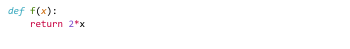

Now let’s create some code around this to visualize the data — we’ll import NumPy and
Matplotlib, create an array of 5 input values from 0 to 4, calculate the function output for each
of these input values, and plot the result as lines between consecutive points. These points’
coordinates are inputs as ​ x ​ and function outputs as ​ y ​ :

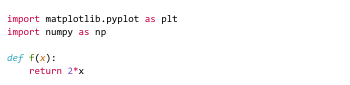

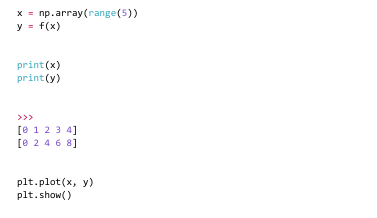

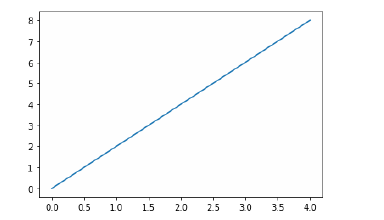
Figure 1: Linear function y=2x graphed

The Slope
This looks like an output of the ​ f(x) = 2x ​ function, which is a line. How might you define the
impact ​ that ​ x ​ will have on ​ y ? ​ Some will say, ​ “y ​ is double ​ x ​ ” Another way to describe the ​ impact
of a linear function such as this comes from algebra: the ​ slope​ . “Rise over run” might be a phrase
you recall from school. The slope of a line is:

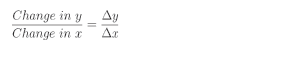

It is change in ​ y ​ divided by change in ​ x, ​ or, in math — ​ delta y ​ divided by ​ delta x . ​ What’s the slope
of ​ f(x) = 2x ​ then?
To calculate the slope, first we have to take any two points lying on the function’s graph and
subtract them to calculate the change. Subtracting the points means to subtract their x and y
dimensions respectively. Division of the change in y by the change in x returns the slope:

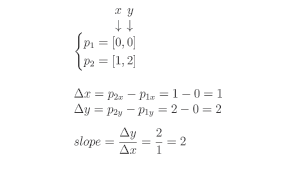
Continuing the code, we keep all values of ​ x ​ in a single-dimensional NumPy array, ​ x ​ , and all
results in a single-dimensional array, ​ y ​ . To perform the same operation, we’ll take ​ x[​ 0 ​ ] ​ and
y[​ 0 ​ ] ​ for the first point, then ​ x[​ 1 ​ ] ​ and ​ y[​ 1 ​ ] ​ for the second one. Now we can calculate the slope
between them:

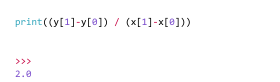

It is not surprising that the slope of this line is 2. We could say the measure of the impact that ​ x
has on ​ y ​ is 2. We can calculate the slope in the same way for any linear function, including linear
functions that aren’t as obvious.
What about a nonlinear function like ​ f(x)=2x 2 ​ ​ ?
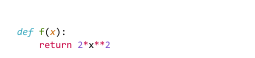
This function creates a graph that does not form a straight line:


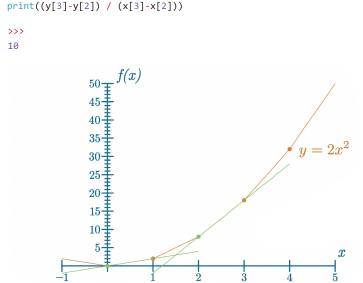
Figure 2:​ Approximation of the parabolic function y=2x​ 2​ graphed
Can we measure the slope of this curve? Depending on which 2 points we choose to use, we will
measure varying slopes:


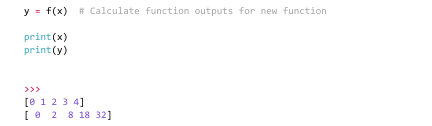
Now for the first pair of points:
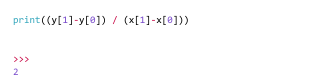
And for another one:

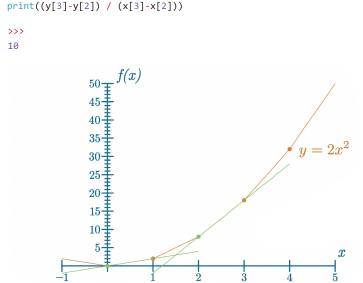
Figure 3:​ Approximation of the parabolic function's example tangents

How might we measure the impact that x has on y in this nonlinear function? Calculus proposes
that we measure the slope of the ​ tangent line​ at ​ x ​ (for a specific input value to the function),
giving us the​ instantaneous slope​ (slope at this point)​ , ​ which is the ​ derivative​ . The ​ tangent line
is created by drawing a line between two points that are “infinitely close” on a curve, but this
curve has to be differentiable at the derivation point. This means that it has to be continuous and
smooth (we cannot calculate the slope at something that we could describe as a “sharp corner,”
since it contains an infinite number of slopes). Then, because this is a curve, there is no single
slope. Slope depends on where we measure it. To give an immediate example, we can
approximate a derivative of the function at ​ x ​ by using this point and another one also taken at x,
but with a very small delta added to it, such as ​ 0.0001 . ​ This number is a common choice as it does
not introduce too large an error (when estimating the derivative) or cause the whole expression to
be numerically unstable (Δ​ x ​ might round to 0 due to floating-point number resolution). This lets
us perform the same calculation for the slope as before, but on two points that are very close to
each other, resulting in a good approximation of a slope at x:
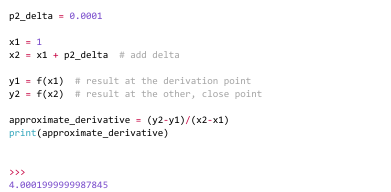
As we will soon learn, the derivative of ​ 2x ​ 2 ​ at ​ x=1 ​ should be exactly ​ 4 ​ . The difference we see
(~4.0002) comes from the method used to compute the tangent. We chose a delta small enough toChapter 7 - Derivatives - Neural Networks from Scratch in Python
13
approximate the derivative as accurately as possible but large enough to prevent a rounding error.
To elaborate, an infinitely small delta value will approximate an accurate derivative; however, the
delta value needs to be numerically stable, meaning, our delta can not surpass the limitations of
Python’s floating-point precision (can’t be too small as it might be rounded to ​ 0 ​ and, as we know,
dividing by ​ 0 ​ is “illegal”). Our solution is, therefore, restricted between estimating the derivative
and remaining numerically stable, thus introducing this small but visible error.

## The Numerical Derivative
This method of calculating the derivative is called ​ numerical differentiation ​ — calculating the
slope of the tangent line using two ​ infinitely ​ close points, or as with the code solution —
calculating the slope of a tangent line made from two points that were “sufficiently close.” We
can visualize why we perform this on two close points with the following:
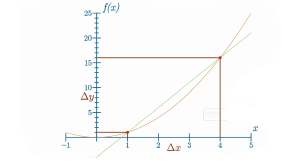

Figure 2:​ Why we want to use 2 points that are sufficiently close — large delta inaccuracy.

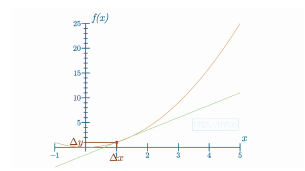 

Figure 5:​ Why we want to use 2 points that are sufficiently close — very small delta accuracy.
We can see that the closer these two points are to each other, the more correct the tangent line
appears to be.
Continuing with ​ numerical differentiation​ , let us visualize the tangent lines and how they
change depending on where we calculate them. To begin, we’ll make the graph of this function
more granular using Numpy’s ​ arange()​ , a ​ llowing us to plot with smaller steps. The
np.arange()​ f ​ unction takes in ​ start, stop, ​ and ​ step ​ parameters, allowing us to take fractions of a
step, such as ​ 0.001 ​ at a time:

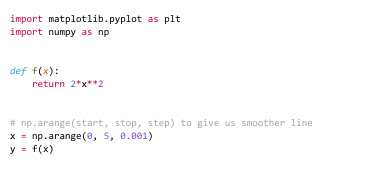

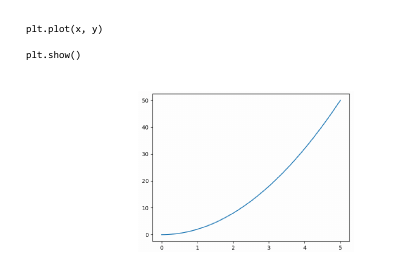

Figure 6:​ Matplotlib output that you should see from graphing y=2x​ 2​ .

To draw these tangent lines, we will derive the function for the tangent line at a point and plot
the tangent on the graph at this point. The function for a straight line is ​ y = mx+b . ​ Where ​ m ​ is
the slope or the ​ approximate_derivative ​ that we’ve already calculated. And​ x i ​ s the input which
leaves ​ b ​ , or the y-intercept, for us to calculate. The slope remains unchanged, but currently, you
can “move” the line up or down using the y-intercept. We already know ​ x ​ and ​ m ​ , but ​ b ​ is still
unknown. Let’s assume ​ m=1 ​ for the purpose of the figure and see what exactly it means:

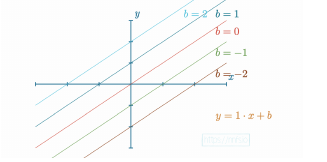
Figure 7:​ Various biases graphed where slope = 1.

To calculate ​ b, ​ the formula is ​ b = y - mx ​ :

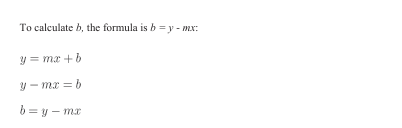

So far we’ve used two points — the point that we want to calculate the derivative at and the
“close enough” to it point to calculate the approximation of the derivative. Now, given the above
equation for ​ b , ​ the approximation of the derivative and the same “close enough” point (its ​ x ​ and ​ y
coordinates to be specific), we can substitute them in the equation and get the y-intercept for the
tangent line at the derivation point. Using code:

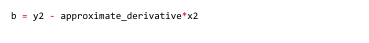

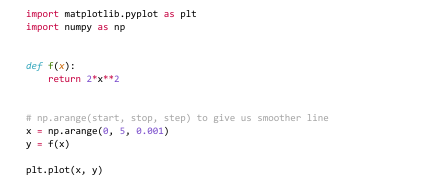
Putting them together:
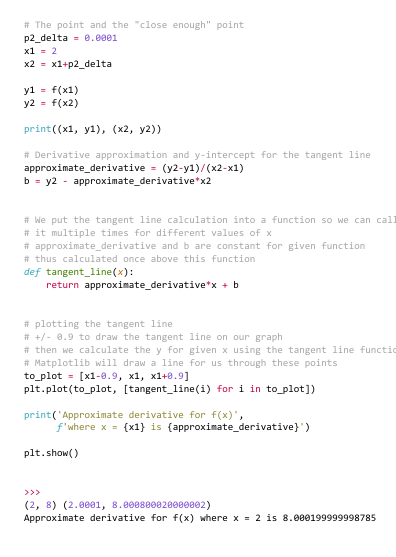

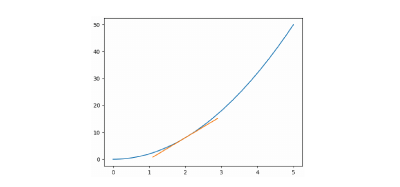
Figure 8:​ Graphed approximate derivative for f(x) where x = 2

The orange line is the approximate tangent line at ​ x=2 ​ for the function ​ f(x) = 2x ​ 2 . ​ Why do we care
about this? You will soon find that we care only about the ​ slope ​ of this tangent line but both
visualizing and understanding the ​ tangent line​ are very important. We care about the slope of the
tangent line because it informs us about the ​ impact ​ that ​ x ​ has on this function at a particular point,
referred to as the ​ instantaneous rate of change​ . We will use this concept to determine the effect
of a specific weight or bias on the overall loss function given a sample. For now, with different
values for ​ x , ​ we can observe resulting impacts on the function. We can continue the previous code
to see the tangent line for various inputs (​ x) ​ - we put a part of the code in a loop over example ​ x
values and plot multiple tangent lines:

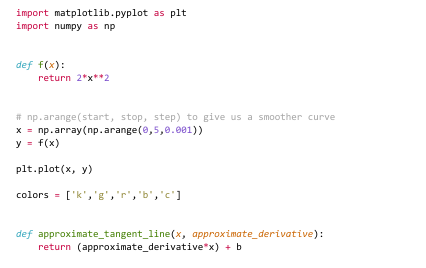
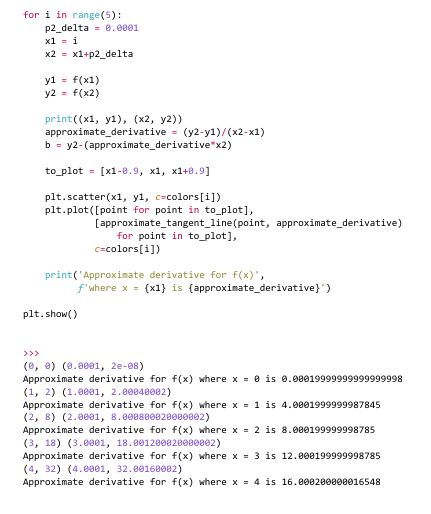
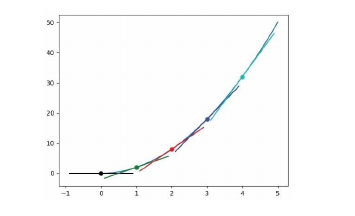
Figure 9:​ Derivative calculated at various points.

For this simple function, ​ f(x) = 2x ​ 2 , ​ we didn’t pay a high penalty by approximating the derivative
(i.e., the slope of the tangent line) like this, and received a value that was close enough for our
needs.
The problem is that the ​ actual ​ function employed in our neural network is not so simple. The loss
function contains all of the layers, weights, and biases — it’s an absolutely massive function
operating in multiple dimensions! Calculating derivatives using ​ numerical differentiation
requires multiple forward passes for a single parameter update (we’ll talk about parameter updates
in chapter 10). We need to perform the forward pass as a reference, then update a single
parameter by the delta value and perform the forward pass through our model again to see the
change of the loss value. Next, we need to calculate the ​ derivative​ and revert the parameter
change that we made for this calculation. We have to repeat this for every weight and bias and for
every sample, which will be very time-consuming. We can also think of this method as
brute-forcing the derivative calculations. To reiterate, as we quickly covered many terms, the
derivative​ is the ​ slope​ of the ​ tangent line​ for a function that takes a single parameter as an input.
We’ll use this ability to calculate the slopes of the loss function at each of the weight and bias
points — this brings us to the multivariate function, which is a function that takes multiple
parameters and is a topic for the next chapter — the partial derivative.



## The Analytical Derivative

Now that we have a better idea of what a derivative ​ is ​ , how to calculate the numerical (also called
universal) derivative, and why it’s not a good approach for us, we can move on to the ​ Analytical
Derivative​ , the actual solution to the derivative that we’ll implement in our code.
In mathematics, there are two general ways to solve problems: ​ numerical ​ and ​ analytical
methods. Numerical solution methods involve coming up with a number to find a solution, like
the above approach with ​ approximate_derivative​ . The numerical solution is also an
approximation. On the other hand, the analytical method offers the exact and much quicker, in
terms of calculation, solution. However, identifying the analytical solution for the derivative of a
given function, as we’ll quickly learn, will vary in complexity, whereas the numerical approach
never gets more complicated — it’s always calling the method twice with two inputs to calculate
the approximate derivative at a point. Some analytical solutions are quite obvious, some can be
calculated with simple rules, and some complex functions can be broken down into simpler parts
and calculated using the so-called ​ chain rule​ . We can leverage already-proven derivative
solutions for certain functions, and others — like our loss function — can be solved with
combinations of the above.
To compute the derivative of functions using the analytical method, we can split them into simple,
elemental functions, finding the derivatives of those and then applying the ​ chain rule​ , which we
will explain soon, to get the full derivative. To start building an intuition, let’s start with simple
functions and their respective derivatives.
The derivative of a simple constant function:
    
  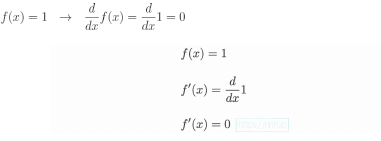  
    
When calculating the derivative of a function, recall that the derivative can be interpreted as a
slope. In this example, the result of this function is a horizontal line as the output value for any x
is 1:
By looking at it, it becomes evident that the derivative equals 0 since there’s no change from one
value of x to any other value of x (i.e., there’s no slope).
So far, we are calculating derivatives of the functions by taking a single parameter, ​ x ​ in our case,
in each example. This changes with partial derivatives since they take functions with multiple
parameters, and we’ll be calculating the derivative with respect to only one of them at a time. For
now, with derivatives, it’s always with respect to a single parameter. To denote the derivative,
we can use prime notation, where, for the function ​ f(x), ​ we add a prime (') like f​ '(x) ​ . For our
example, ​ f(x) = 1 , ​ the derivative ​ f'(x) = 0 . ​ Another notation we can use is called the Leibniz’s
notation — the dependence on the prime notation and multiple ways of writing the derivative
with the Leibniz’s notation is as follows:    

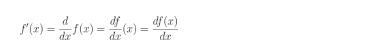

Each of these notations has the same meaning — the derivative of a function (with respect to ​ x ) ​ .
In the following examples, we use both notations, since sometimes it’s convenient to use one
notation or another. We can also use both of them in a single equation.
In summary: the derivative of a constant function equals ​ 0 ​ :

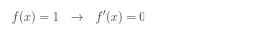

The derivative of a linear function:
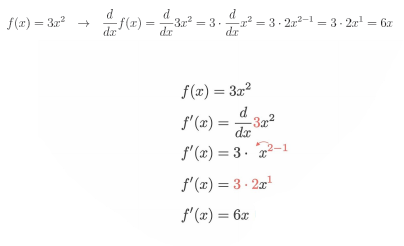


Figure 11: Derivative of a linear function — calculation steps.

In this case, the derivative is 1, and the intuition behind this is that for every change of x, y
changes by the same amount, so y changes one times the x.
The derivative of the linear function equals ​ 1 ​ (but not in every case, which we’ll explain next ):
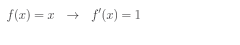

What if we try 2x, which is also a linear function?

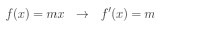
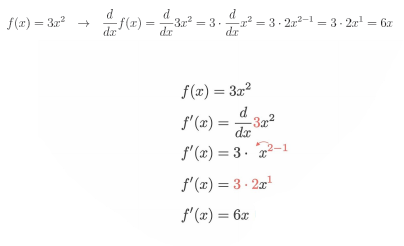


Figure 13:​ Derivative of quadratic function — calculation steps.

First, we are applying the rule of a constant — we can move the coefficient (the value that
multiplies the other value) outside of the derivative. The rule for handling exponents is as follows:
take the exponent, in this case a ​ 2 ​ , and use it as a coefficient for the derived value, then, subtract 1
from the exponent, as seen here: ​ 2 - 1 = 1 . ​
If ​ f(x) = 3x 2 ​ ​ then
f'(x) = 3·2x ​ 1 or
simply ​ 6x. T
his means the slope of the tangent line, at any point,
x ​ , for this quadratic function, will be ​ 6x . ​ As discussed with the numerical solution of the quadratic
function differentiation, the derivative of a quadratic function depends on the ​ x ​ and in this case it
equals ​ 6x ​ :

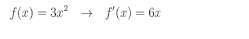

A commonly used operator in functions is addition, how do we calculate the derivative in this
case?

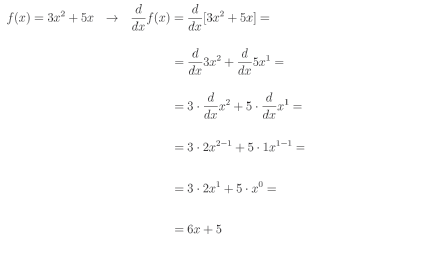

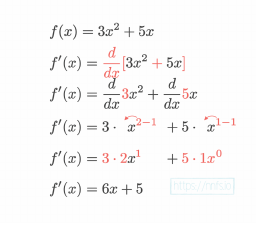

Figure 14:​ Derivative of quadratic function with addition — calculation steps

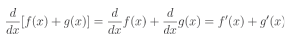

In this case, we’ve shown the rule using both notations.
Let’s try a couple more examples:
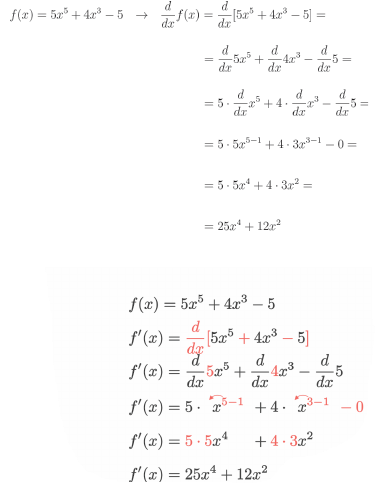

The derivative of a constant 5 equals 0, as we already discussed at the beginning of this chapter. We also have to apply the other rules that we’ve learned so far to perform this calculation.

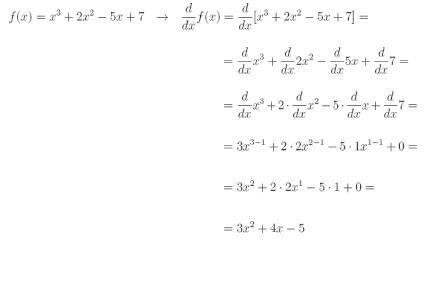
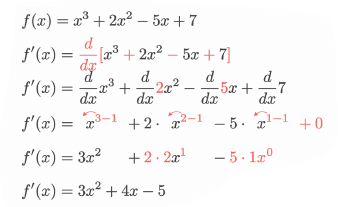

Figure 16:​ Analytical derivative of another multi-dimensional function example — calculation
steps.
This looks relatively straight-forward so far, but, with neural networks, we’ll work with functions that take multiple parameters as inputs, so we’re going to calculate the partial derivatives as well.



